<a href="https://colab.research.google.com/github/sasumwen/bulldozer-price-estimator/blob/main/sales_price_bulldozers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print('pd version:', pd.__version__) 
print('np version:', np.__version__)

pd version: 1.3.5
np version: 1.21.6


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# !unzip "drive/MyDrive/sales-price-bulldozers/bluebook-for-bulldozers.zip" -d "drive/MyDrive/sales-price-bulldozers/"

In [5]:
df = pd.read_csv("drive/MyDrive/sales-price-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

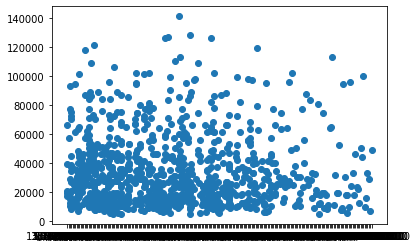

In [7]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

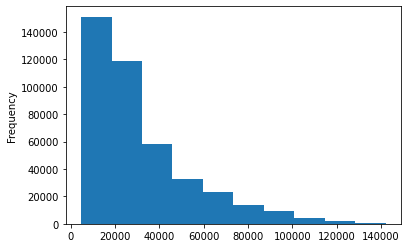

In [8]:
df.SalePrice.plot.hist()

## Parsing dates

When working with time series data, it's a good idea to make sure any date data is the format of a [datetime object](https://docs.python.org/3/library/datetime.html) (a Python data type which encodes specific information about dates).

In [9]:
df = pd.read_csv("drive/MyDrive/sales-price-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])

In [10]:
# check dtype of saledate
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

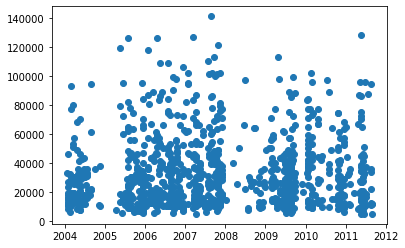

In [11]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [12]:
df

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246    66000.0     999089     3157         121           3.0   
1       1139248    57000.0     117657       77         121           3.0   
2       1139249    10000.0     434808     7009         121           3.0   
3       1139251    38500.0    1026470      332         121           3.0   
4       1139253    11000.0    1057373    17311         121           3.0   
...         ...        ...        ...      ...         ...           ...   
412693  6333344    10000.0    1919201    21435         149           2.0   
412694  6333345    10500.0    1882122    21436         149           2.0   
412695  6333347    12500.0    1944213    21435         149           2.0   
412696  6333348    10000.0    1794518    21435         149           2.0   
412697  6333349    13000.0    1944743    21436         149           2.0   

        YearMade  MachineHoursCurrentMeter UsageBand   saledate  ...  \
0           2004                      68.0       Low 2006-11-16  ...   
1           1996                    4640.0       Low 2004-03-26  ...   
2           2001                    2838.0      High 2004-02-26  ...   
3           2001                    3486.0      High 2011-05-19  ...   
4           2007                     722.0    Medium 2009-07-23  ...   
...          ...                       ...       ...        ...  ...   
412693      2005                       NaN       NaN 2012-03-07  ...   
412694      2005                       NaN       NaN 2012-01-28  ...   
412695      2005                       NaN       NaN 2012-01-28  ...   
412696      2006                       NaN       NaN 2012-03-07  ...   
412697      2006                       NaN       NaN 2012-01-28  ...   

       Undercarriage_Pad_Width         Stick_Length                Thumb  \
0                          NaN                  NaN                  NaN   
1                          NaN                  NaN                  NaN   
2                          NaN                  NaN                  NaN   
3                          NaN                  NaN                  NaN   
4                          NaN                  NaN                  NaN   
...                        ...                  ...                  ...   
412693     None or Unspecified  None or Unspecified  None or Unspecified   
412694     None or Unspecified  None or Unspecified  None or Unspecified   
412695     None or Unspecified  None or Unspecified  None or Unspecified   
412696     None or Unspecified  None or Unspecified  None or Unspecified   
412697     None or Unspecified  None or Unspecified  None or Unspecified   

            Pattern_Changer Grouser_Type Backhoe_Mounting Blade_Type  \
0                       NaN          NaN              NaN        NaN   
1                       NaN          NaN              NaN        NaN   
2                       NaN          NaN              NaN        NaN   
3                       NaN          NaN              NaN        NaN   
4                       NaN          NaN              NaN        NaN   
...                     ...          ...              ...        ...   
412693  None or Unspecified       Double              NaN        NaN   
412694  None or Unspecified       Double              NaN        NaN   
412695  None or Unspecified       Double              NaN        NaN   
412696  None or Unspecified       Double              NaN        NaN   
412697  None or Unspecified       Double              NaN        NaN   

       Travel_Controls Differential_Type Steering_Controls  
0                  NaN          Standard      Conventional  
1                  NaN          Standard      Conventional  
2                  NaN               NaN               NaN  
3                  NaN               NaN               NaN  
4                  NaN               NaN               NaN  
...                ...               ...               ...  
412693             NaN   

In [13]:
df.head().T

0  \
SalesID                                                    1139246   
SalePrice                                                  66000.0   
MachineID                                                   999089   
ModelID                                                       3157   
datasource                                                     121   
auctioneerID                                                   3.0   
YearMade                                                      2004   
MachineHoursCurrentMeter                                      68.0   
UsageBand                                                      Low   
saledate                                       2006-11-16 00:00:00   
fiModelDesc                                                   521D   
fiBaseModel                                                    521   
fiSecondaryDesc                                                  D   
fiModelSeries                                                  NaN   
fiModelDescriptor                                              NaN   
ProductSize                                                    NaN   
fiProductClassDesc        Wheel Loader - 110.0 to 120.0 Horsepower   
state                                                      Alabama   
ProductGroup                                                    WL   
ProductGroupDesc                                      Wheel Loader   
Drive_System                                                   NaN   
Enclosure                                               EROPS w AC   
Forks                                          None or Unspecified   
Pad_Type                                                       NaN   
Ride_Control                                   None or Unspecified   
Stick                                                          NaN   
Transmission                                                   NaN   
Turbocharged                                                   NaN   
Blade_Extension                                                NaN   
Blade_Width                                                    NaN   
Enclosure_Type                                                 NaN   
Engine_Horsepower                                              NaN   
Hydraulics                                                 2 Valve   
Pushblock                                                      NaN   
Ripper                                                         NaN   
Scarifier                                                      NaN   
Tip_Control                                                    NaN   
Tire_Size                                      None or Unspecified   
Coupler                                        None or Unspecified   
Coupler_System                                                 NaN   
Grouser_Tracks                                                 NaN   
Hydraulics_Flow                                                NaN   
Track_Type                                                     NaN   
Undercarriage_Pad_Width                                        NaN   
Stick_Length                                                   NaN   
Thumb                                                          NaN   
Pattern_Changer                                                NaN   
Grouser_Type                                                   NaN   
Backhoe_Mounting                                               NaN   
Blade_Type                                                     NaN   
Travel_Controls                                                NaN   
Differential_Type                                         Standard   
Steering_Controls                                     Conventional   

                                                                 1  \
SalesID                                                    1139248   
SalePrice                                                  57000.0   
MachineID                                                   117657   
Mode

In [14]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

## Sort DataFrame by saledate 

As we're working on a time series problem and trying to predict future examples given past examples, it makes sense to sort our data by date.

In [15]:
df.sort_values(by =["saledate"], inplace = True, ascending = True)

In [16]:
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame
Since we're going to be manipulating the data, we'll make a copy of the original DataFrame and perform our changes there.

This will keep the original DataFrame in tact if we need it again.

In [17]:
# Make a copy of the original DataFrame to perform edits on
df_tmp=df.copy()

Add datetime parameters for saledate column
Why?

So we can enrich our dataset with as much information as possible.

Because we imported the data using `read_csv()` and we asked pandas to parse the dates using `parse_dates=["saledate"]`, we can now access the [different datetime attributes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) of the `saledate` column.

In [18]:
# Add datetime params for saledate
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"]=df_tmp.saledate.dt.month
df_tmp["saleDay"]=df_tmp.saledate.dt.day
df_tmp["saleDayofweek"]= df_tmp.saledate.dt.dayofweek
df_tmp['saleDayofyear']=df_tmp.saledate.dt.dayofyear

# drop original saledate
df_tmp.drop("saledate", axis=1, inplace=True)

In [19]:
df_tmp.head().T

205615  \
SalesID                                                             1646770   
SalePrice                                                            9500.0   
MachineID                                                           1126363   
ModelID                                                                8434   
datasource                                                              132   
auctioneerID                                                           18.0   
YearMade                                                               1974   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                               NaN   
fiModelDesc                                                            TD20   
fiBaseModel                                                            TD20   
fiSecondaryDesc                                                         NaN   
fiModelSeries                                                           NaN   
fiModelDescriptor                                                       NaN   
ProductSize                                                          Medium   
fiProductClassDesc        Track Type Tractor, Dozer - 105.0 to 130.0 Hor...   
state                                                                 Texas   
ProductGroup                                                            TTT   
ProductGroupDesc                                        Track Type Tractors   
Drive_System                                                            NaN   
Enclosure                                                             OROPS   
Forks                                                                   NaN   
Pad_Type                                                                NaN   
Ride_Control                                                            NaN   
Stick                                                                   NaN   
Transmission                                                   Direct Drive   
Turbocharged                                                            NaN   
Blade_Extension                                                         NaN   
Blade_Width                                                             NaN   
Enclosure_Type                                                          NaN   
Engine_Horsepower                                                       NaN   
Hydraulics                                                          2 Valve   
Pushblock                                                               NaN   
Ripper                                                  None or Unspecified   
Scarifier                                                               NaN   
Tip_Control                                                             NaN   
Tire_Size                                                               NaN   
Coupler                                                                 NaN   
Coupler_System                                                          NaN   
Grouser_Tracks                                                          NaN   
Hydraulics_Flow                                                         NaN   
Track_Type                                                              NaN   
Undercarriage_Pad_Width                                                 NaN   
Stick_Length                                                            NaN   
Thumb                                                                   NaN   
Pattern_Changer                                                         NaN   
Grouser_Type                                                            NaN   
Backhoe_Mounting                                        None or Unspecified   
Blade_Type                                                         Straight   
Travel_Controls                                         None or Unspecified   
Differential_Type                       

In [20]:
# cheeck value counts of state columns
df_tmp["state"].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Modeling


In [21]:
# check data info 
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [22]:
# check for missing
df_tmp.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Convert strings to categories
One way to help turn all of our data into numbers is to convert the columns with the string datatype into a category datatype.

To do this we can use the `pandas types API` which allows us to interact and manipulate the types of data.

In [23]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [24]:
# these columns contain strings
for column, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(column)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [25]:
# turn all string values to categorical values
for column, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[column]=content.astype('category').cat.as_ordered()

In [26]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [27]:
df_tmp["state"].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [28]:
df_tmp["state"].cat.codes


205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [29]:
df_tmp.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Save Processed Data

In [30]:
df_tmp.to_csv("drive/MyDrive/sales-price-bulldozers/bluebook-for-bulldozers/train_tmp.csv",
              index=False)

In [31]:
# import the dayta
df_tmp=pd.read_csv("drive/MyDrive/sales-price-bulldozers/bluebook-for-bulldozers/train_tmp.csv",
                   low_memory=False)

In [32]:
df_tmp.head().T

0  \
SalesID                                                             1646770   
SalePrice                                                            9500.0   
MachineID                                                           1126363   
ModelID                                                                8434   
datasource                                                              132   
auctioneerID                                                           18.0   
YearMade                                                               1974   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                               NaN   
fiModelDesc                                                            TD20   
fiBaseModel                                                            TD20   
fiSecondaryDesc                                                         NaN   
fiModelSeries                                                           NaN   
fiModelDescriptor                                                       NaN   
ProductSize                                                          Medium   
fiProductClassDesc        Track Type Tractor, Dozer - 105.0 to 130.0 Hor...   
state                                                                 Texas   
ProductGroup                                                            TTT   
ProductGroupDesc                                        Track Type Tractors   
Drive_System                                                            NaN   
Enclosure                                                             OROPS   
Forks                                                                   NaN   
Pad_Type                                                                NaN   
Ride_Control                                                            NaN   
Stick                                                                   NaN   
Transmission                                                   Direct Drive   
Turbocharged                                                            NaN   
Blade_Extension                                                         NaN   
Blade_Width                                                             NaN   
Enclosure_Type                                                          NaN   
Engine_Horsepower                                                       NaN   
Hydraulics                                                          2 Valve   
Pushblock                                                               NaN   
Ripper                                                  None or Unspecified   
Scarifier                                                               NaN   
Tip_Control                                                             NaN   
Tire_Size                                                               NaN   
Coupler                                                                 NaN   
Coupler_System                                                          NaN   
Grouser_Tracks                                                          NaN   
Hydraulics_Flow                                                         NaN   
Track_Type                                                              NaN   
Undercarriage_Pad_Width                                                 NaN   
Stick_Length                                                            NaN   
Thumb                                                                   NaN   
Pattern_Changer                                                         NaN   
Grouser_Type                                                            NaN   
Backhoe_Mounting                                        None or Unspecified   
Blade_Type                                                         Straight   
Travel_Controls                                         None or Unspecified   
Differential_Type                            

# Fill missing values

From our experience with machine learning models. We know two things:

1. All of our data has to be numerical
2. There can't be any missing values

And as we've seen using `df_tmp.isna().sum()` our data still has plenty of missing values.

Let's fill them.

## Filling numerical values first
We're going to fill any column with missing values with the median of that column.

In [33]:
for column, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(column)


SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofweek
saleDayofyear


In [34]:
# check the num column that has isnull()

for column, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(column)


auctioneerID
MachineHoursCurrentMeter


In [35]:
# fill the numeric rows with median
for column, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # add a binary column which tells the data was missing or not
      df_tmp[column+'_is_missing']= pd.isnull(content)
      # fill the missing numeric val with median since it is more robust than mean
      df_tmp[column]=content.fillna(content.median())

Why add a binary column indicating whether the data was missing or not?

We can easily fill all of the missing numeric values in our dataset with the median. However, a numeric value may be missing for a reason. In other words, absence of evidence may be evidence of absence. Adding a binary column which indicates whether the value was missing or not helps to retain this information.

In [36]:
# check is null still in numeric columns
for column, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(column)

In [37]:
# using auctioneerID check out how many where missing
df_tmp["auctioneerID_is_missing"].value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

### Filling and turning categorical variables to numbers
Now we've filled the numeric values, we'll do the same with the categorical values at the same time as turning them into numbers.

In [38]:
for column, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(column)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [39]:
# turn cat barables into numbers
for column, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    # add binary col for missing value
    df_tmp[column+"_is_missing"]= pd.isnull(content)
    # add +1 coss pandas encodes missing categories as -1
    df_tmp[column]= pd.Categorical(content).codes+1

In [40]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [41]:
df_tmp.isnull().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [42]:
df_tmp.head().T

0        1        2        3        4
SalesID                       1646770  1821514  1505138  1671174  1329056
SalePrice                      9500.0  14000.0  50000.0  16000.0  22000.0
MachineID                     1126363  1194089  1473654  1327630  1336053
ModelID                          8434    10150     4139     8591     4089
datasource                        132      132      132      132      132
...                               ...      ...      ...      ...      ...
Backhoe_Mounting_is_missing     False     True    False     True    False
Blade_Type_is_missing           False     True    False     True    False
Travel_Controls_is_missing      False     True    False     True    False
Differential_Type_is_missing     True    False     True    False     True
Steering_Controls_is_missing     True    False     True    False     True

[103 rows x 5 columns]

In [43]:
df_tmp.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1646770     9500.0    1126363     8434         132          18.0      1974   
1  1821514    14000.0    1194089    10150         132          99.0      1980   
2  1505138    50000.0    1473654     4139         132          99.0      1978   
3  1671174    16000.0    1327630     8591         132          99.0      1980   
4  1329056    22000.0    1336053     4089         132          99.0      1984   

   MachineHoursCurrentMeter  UsageBand  fiModelDesc  ...  \
0                       0.0          0         4593  ...   
1                       0.0          0         1820  ...   
2                       0.0          0         2348  ...   
3                       0.0          0         1819  ...   
4                       0.0          0         2119  ...   

   Undercarriage_Pad_Width_is_missing  Stick_Length_is_missing  \
0                                True                     True   
1                                True                     True   
2                                True                     True   
3                                True                     True   
4                                True                     True   

   Thumb_is_missing  Pattern_Changer_is_missing  Grouser_Type_is_missing  \
0              True                        True                     True   
1              True                        True                     True   
2              True                        True                     True   
3              True                        True                     True   
4              True                        True                     True   

   Backhoe_Mounting_is_missing  Blade_Type_is_missing  \
0                        False                  False   
1                         True                   True   
2                        False                  False   
3                         True                   True   
4                        False                  False   

   Travel_Controls_is_missing  Differential_Type_is_missing  \
0                       False                          True   
1                        True                         False   
2                       False                          True   
3                        True                         False   
4                       False                          True   

   Steering_Controls_is_missing  
0                          True  
1                         False  
2                          True  
3                         False  
4                          True  

[5 rows x 103 columns]

### Splitting data into train/valid sets

According to the [Kaggle data page](https://www.kaggle.com/c/bluebook-for-bulldozers/data), the validation set and test set are split according to dates.

This makes sense since we're working on a time series problem.

E.g. using past events to try and predict future events.

Knowing this, randomly splitting our data into train and test sets using something like `train_test_split()` wouldn't work.

Instead, we split our data into training, validation and test sets using the date each sample occured.

In our case:

* Training = all samples up until 2011
* Valid = all samples form January 1, 2012 - April 30, 2012
* Test = all samples from May 1, 2012 - November 2012

For more on making good training, validation and test sets, check out the post [How (and why) to create a good validation set](https://www.fast.ai/posts/2017-11-13-validation-sets.html) by Rachel Thomas.

In [45]:
df_tmp["saleYear"].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [47]:
# split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [49]:
# split data into X&y

X_train, y_train = df_train.drop("SalePrice", axis =1), df_train['SalePrice']
X_val, y_val = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

According to Kaggle for the Bluebook for Bulldozers competition, [the evaluation function](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation) they use is root mean squared log error (RMSLE).

RMSLE = generally you don't care as much if you're off by $10 as much as you'd care if you were off by 10%, you care more about ratios rather than differences. MAE (mean absolute error) is more about exact differences.

It's important to understand the evaluation metric you're going for.

Since Scikit-Learn doesn't have a function built-in for RMSLE, we'll create our own.

We can do this by taking the square root of Scikit-Learn's [mean_squared_log_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error) (MSLE). MSLE is the same as taking the log of mean squared error (MSE).

We'll also calculate the MAE and R^2 for fun.

In [50]:
# create evaluation funtion( the compoetition uses root MSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
  return np.sqrt(mean_squared_log_error(y_test, y_preds))

# create funct tp evaluate model
def show_scores(model):
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)
  scores = {
            "Training MAE": mean_absolute_error(y_train, train_preds),
            "Validation MAE": mean_absolute_error(y_val, val_preds),
            "Training RMSLE": rmsle(y_train, train_preds),
            "Validation RMSLE": rmsle(y_val, val_preds),
            "Training R^2": model.score(X_train, y_train),
            "Validatin R^2": model.score(X_val, y_val)
          }
  return scores

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
model = RandomForestRegressor()

In [57]:
%%time
# training on training data
model.fit(X_train, y_train)
show_scores(model)

CPU times: user 11min 13s, sys: 3.17 s, total: 11min 16s
Wall time: 11min 19s


{'Training MAE': 1577.5132794764727,
 'Validation MAE': 6110.061093925517,
 'Training RMSLE': 0.08425446745850243,
 'Validation RMSLE': 0.25453289171867177,
 'Training R^2': 0.9875400522660067,
 'Validatin R^2': 0.8733827662087309}

### Hyperparameter tuning with RandomizedSearchCV

In [61]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {
            "n_estimators": np.arange(10,100,10),
            "max_depth": [None, 3,5,10],
            "min_samples_split": np.arange(2,20,2),
            "min_samples_leaf": np.arange(1,20,2),
            "max_features": [0.5,1, "sqrt", "auto"],
          }

rs_model = RandomizedSearchCV(
                              RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True
                            )

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 1h 24min 28s, sys: 52.7 s, total: 1h 25min 21s
Wall time: 1h 25min 19s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [62]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 14,
 'min_samples_leaf': 3,
 'max_features': 0.5,
 'max_depth': None}

In [63]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 3144.38101906745,
 'Validation MAE': 5916.564958781217,
 'Training RMSLE': 0.1546146371037471,
 'Validation RMSLE': 0.24326660361186228,
 'Training R^2': 0.9518437244030754,
 'Validatin R^2': 0.8822301106591222}

### Train a model with the best parameters
In a model I prepared earlier, I tried 100 different combinations of hyperparameters (setting `n_iter` to 100 in `RandomizedSearchCV`) and found the best results came from the ones you see below. 

We'll instantiate a new model with these discovered hyperparameters and reset the `max_samples` back to its original value.

In [65]:
%%time
ideal_model = RandomForestRegressor(
                                      n_estimators=60,
                                      min_samples_leaf=3,
                                      min_samples_split=14,
                                      max_features=0.5,
                                      n_jobs=-1,
                                      max_samples=None
                                    )

ideal_model.fit(X_train, y_train)

CPU times: user 3min 50s, sys: 862 ms, total: 3min 51s
Wall time: 2min 15s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3,
                      min_samples_split=14, n_estimators=60, n_jobs=-1)

In [66]:
show_scores(ideal_model)

{'Training MAE': 3143.9158815347487,
 'Validation MAE': 5942.323333922424,
 'Training RMSLE': 0.15467781913237794,
 'Validation RMSLE': 0.24450591240915662,
 'Training R^2': 0.9518259649493004,
 'Validatin R^2': 0.8814419700269452}


###Make predictions on test data
Now we've got a trained model, it's time to make predictions on the test data.

Remember what we've done.

Our model is trained on data prior to 2011. However, the test data is from May 1 2012 to November 2012.

So what we're doing is trying to use the patterns our model has learned in the training data to predict the sale price of a Bulldozer with characteristics it's never seen before but are assumed to be similar to that of those in the training data.

In [73]:
df_test = pd.read_csv('drive/MyDrive/sales-price-bulldozers/bluebook-for-bulldozers/Test.csv',
                      parse_dates=["saledate"])
df_test.head()

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1227829    1006309     3168         121             3      1999   
1  1227844    1022817     7271         121             3      1000   
2  1227847    1031560    22805         121             3      2004   
3  1227848      56204     1269         121             3      2006   
4  1227863    1053887    22312         121             3      2005   

   MachineHoursCurrentMeter UsageBand   saledate fiModelDesc  ...  \
0                    3688.0       Low 2012-05-03        580G  ...   
1                   28555.0      High 2012-05-10         936  ...   
2                    6038.0    Medium 2012-05-10    EC210BLC  ...   
3                    8940.0      High 2012-05-10       330CL  ...   
4                    2286.0       Low 2012-05-10        650K  ...   

  Undercarriage_Pad_Width         Stick_Length   Thumb      Pattern_Changer  \
0                     NaN                  NaN     NaN                  NaN   
1                     NaN                  NaN     NaN                  NaN   
2     None or Unspecified                9' 6"  Manual  None or Unspecified   
3     None or Unspecified  None or Unspecified  Manual                  Yes   
4                     NaN                  NaN     NaN                  NaN   

  Grouser_Type     Backhoe_Mounting Blade_Type      Travel_Controls  \
0          NaN                  NaN        NaN                  NaN   
1          NaN                  NaN        NaN                  NaN   
2       Double                  NaN        NaN                  NaN   
3       Triple                  NaN        NaN                  NaN   
4          NaN  None or Unspecified        PAT  None or Unspecified   

  Differential_Type Steering_Controls  
0               NaN               NaN  
1          Standard      Conventional  
2               NaN               NaN  
3               NaN               NaN  
4               NaN               NaN  

[5 rows x 52 columns]

### Preprocessing the test data 
Our model has been trained on data formatted in the same way as the training data.

This means in order to make predictions on the test data, we need to take the same steps we used to preprocess the training data to preprocess the test data.

Remember: Whatever you do to the training data, you have to do to the test data.

Let's create a function for doing so (by copying the preprocessing steps we used above).

In [74]:
def preprocess_data(df):
  # add datetime params for saledate
  df['saleYear'] = df.saledate.dt.year
  df["saleMonth"] = df.saledate.dt.month
  df["saleDay"]  = df.saledate.dt.day
  df["saleDayofweek"] = df.saledate.dt.dayofweek
  df["saleDayofyear"] = df.saledate.dt.dayofyear

  # drop original saledate
  df.drop("saledate", axis = 1, inplace = True)
  
  # fil numeric rows with median
  for column, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
      if pd.isnull(content).sum():
        df[column+"_is_missing"] = pd.isnull(content)
        df[column] = content.fillna(content.median())

    # turn categorical variable to numerical
    if not pd.api.types.is_numeric_dtype(content):
      df[column+"_is_missing"]=pd.isnull(content)
      # add +1 because pandaas encodes missing categories as -1
      df[column]= pd.Categorical(content).codes+1
  
  return df


In [75]:
df_test = preprocess_data(df_test)
df_test.head()

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1227829    1006309     3168         121             3      1999   
1  1227844    1022817     7271         121             3      1000   
2  1227847    1031560    22805         121             3      2004   
3  1227848      56204     1269         121             3      2006   
4  1227863    1053887    22312         121             3      2005   

   MachineHoursCurrentMeter  UsageBand  fiModelDesc  fiBaseModel  ...  \
0                    3688.0          2          499          180  ...   
1                   28555.0          1          831          292  ...   
2                    6038.0          3         1177          404  ...   
3                    8940.0          1          287          113  ...   
4                    2286.0          2          566          196  ...   

   Undercarriage_Pad_Width_is_missing  Stick_Length_is_missing  \
0                                True                     True   
1                                True                     True   
2                               False                    False   
3                               False                    False   
4                                True                     True   

   Thumb_is_missing  Pattern_Changer_is_missing  Grouser_Type_is_missing  \
0              True                        True                     True   
1              True                        True                     True   
2             False                       False                    False   
3             False                       False                    False   
4              True                        True                     True   

   Backhoe_Mounting_is_missing  Blade_Type_is_missing  \
0                         True                   True   
1                         True                   True   
2                         True                   True   
3                         True                   True   
4                        False                  False   

   Travel_Controls_is_missing  Differential_Type_is_missing  \
0                        True                          True   
1                        True                         False   
2                        True                          True   
3                        True                          True   
4                       False                          True   

   Steering_Controls_is_missing  
0                          True  
1                         False  
2                          True  
3                          True  
4                          True  

[5 rows x 101 columns]

In [76]:
df_test.head().T

0        1        2        3        4
SalesID                       1227829  1227844  1227847  1227848  1227863
MachineID                     1006309  1022817  1031560    56204  1053887
ModelID                          3168     7271    22805     1269    22312
datasource                        121      121      121      121      121
auctioneerID                        3        3        3        3        3
...                               ...      ...      ...      ...      ...
Backhoe_Mounting_is_missing      True     True     True     True    False
Blade_Type_is_missing            True     True     True     True    False
Travel_Controls_is_missing       True     True     True     True    False
Differential_Type_is_missing     True    False     True     True     True
Steering_Controls_is_missing     True    False     True     True     True

[101 rows x 5 columns]

In [78]:
X_train.head().T

0        1        2        3        4
SalesID                       1646770  1821514  1505138  1671174  1329056
MachineID                     1126363  1194089  1473654  1327630  1336053
ModelID                          8434    10150     4139     8591     4089
datasource                        132      132      132      132      132
auctioneerID                     18.0     99.0     99.0     99.0     99.0
...                               ...      ...      ...      ...      ...
Backhoe_Mounting_is_missing     False     True    False     True    False
Blade_Type_is_missing           False     True    False     True    False
Travel_Controls_is_missing      False     True    False     True    False
Differential_Type_is_missing     True    False     True    False     True
Steering_Controls_is_missing     True    False     True    False     True

[102 rows x 5 columns]

In [79]:
X_val.head().T

401125   401126   401127   401128   401129
SalesID                       4449186  1222855  6258613  6282680  6282759
MachineID                     2318824   531393  1810917  1543404  1863077
ModelID                         26964    23926    13260     1830    11390
datasource                        173      121      149      149      149
auctioneerID                     99.0      3.0     99.0     99.0     99.0
...                               ...      ...      ...      ...      ...
Backhoe_Mounting_is_missing     False     True     True     True     True
Blade_Type_is_missing           False     True     True     True     True
Travel_Controls_is_missing      False     True     True     True     True
Differential_Type_is_missing     True     True     True     True     True
Steering_Controls_is_missing     True     True     True     True     True

[102 rows x 5 columns]

In [80]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In this case, it's because the test dataset wasn't missing any `auctioneerID` fields.

To fix it, we'll add a column to the test dataset called `auctioneerID_is_missing` and fill it with `False`, since none of the `auctioneerID` fields are missing in the test dataset.

In [81]:
# match the test dataset column with train dataset
df_test["auctioneerID_is_missing"] = False

In [82]:
df_test.head().T

0        1        2        3        4
SalesID                       1227829  1227844  1227847  1227848  1227863
MachineID                     1006309  1022817  1031560    56204  1053887
ModelID                          3168     7271    22805     1269    22312
datasource                        121      121      121      121      121
auctioneerID                        3        3        3        3        3
...                               ...      ...      ...      ...      ...
Blade_Type_is_missing            True     True     True     True    False
Travel_Controls_is_missing       True     True     True     True    False
Differential_Type_is_missing     True    False     True     True     True
Steering_Controls_is_missing     True    False     True     True     True
auctioneerID_is_missing         False    False    False    False    False

[102 rows x 5 columns]

In [83]:
# Make predictions on the test dataset using the best model
test_preds = ideal_model.predict(df_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


When looking at the [Kaggle submission requirements](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation), we see that if we wanted to make a submission, the data is required to be in a certain format. Namely, a DataFrame containing the SalesID and the predicted SalePrice of the bulldozer.

Let's make it.

In [84]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

SalesID     SalePrice
0      1227829  19545.359639
1      1227844  20369.778618
2      1227847  52385.506371
3      1227848  60324.080588
4      1227863  44755.990014
...        ...           ...
12452  6643171  41205.617721
12453  6643173  13007.950866
12454  6643184  14345.491851
12455  6643186  18350.460169
12456  6643196  27796.785260

[12457 rows x 2 columns]

In [85]:
# export to csv
df_preds.to_csv("drive/MyDrive/sales-price-bulldozers/bluebook-for-bulldozers/predictions.csv",
                index = False)

In [88]:
import datetime
import os

In [110]:
def save_model( model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # import pickle for saving randomforestregrssi model
  import pickle

  # Create model directory with current time
  modeldir = os.path.join("drive/MyDrive/sales-price-bulldozers/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path =  modeldir + "-" + suffix + ".pkl" # save format of model
  print(f"Saving model to: {model_path}...")
  pickle.dump(model, open(model_path, "wb"))
  return model_path

In [112]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  import pickle
  print(f"Loading saved model from: {model_path}")
  pickle.load(open(model_path, "rb"))
  
  return model

In [111]:
save_model(ideal_model, suffix ="-by-sasumwen")

Saving model to: drive/MyDrive/sales-price-bulldozers/models/20230209-19201675970402--by-sasumwen.pkl...


'drive/MyDrive/sales-price-bulldozers/models/20230209-19201675970402--by-sasumwen.pkl'

In [113]:
ld = load_model("/content/drive/MyDrive/sales-price-bulldozers/models/20230209-19201675970402--by-sasumwen.pkl")

Loading saved model from: /content/drive/MyDrive/sales-price-bulldozers/models/20230209-19201675970402--by-sasumwen.pkl


In [114]:
ld.score(X_val, y_val)

0.8733827662087309

In [115]:
ld.score(X_train, y_train)

0.9875400522660067